<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Support_Vector_Machine(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['flower_names'] = df['target'].apply(lambda x: iris.target_names[x])

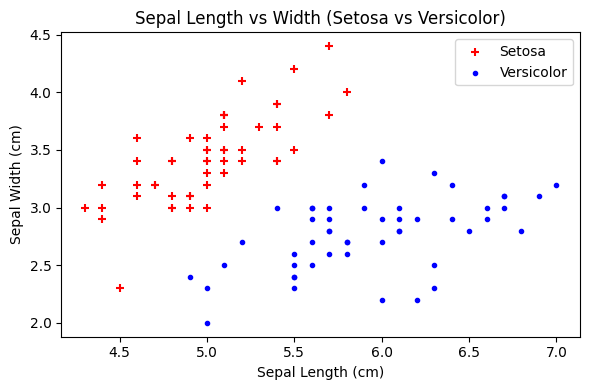

In [3]:
plt.figure(figsize=(6, 4))
plt.scatter(df['sepal length (cm)'][:50], df['sepal width (cm)'][:50], color='r', marker='+', label='Setosa')
plt.scatter(df['sepal length (cm)'][50:100], df['sepal width (cm)'][50:100], color='b', marker='.', label='Versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Width (Setosa vs Versicolor)')
plt.legend()
plt.tight_layout()
plt.show()

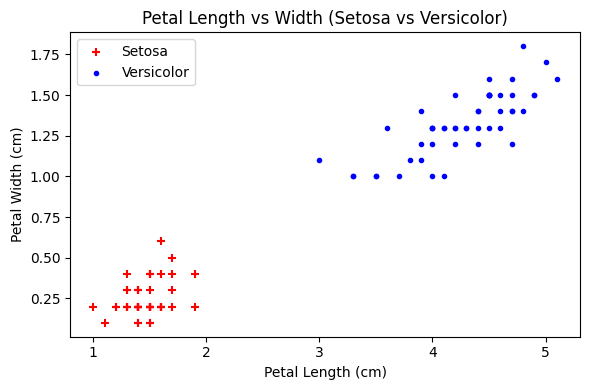

In [4]:
plt.figure(figsize=(6, 4))
plt.scatter(df['petal length (cm)'][:50], df['petal width (cm)'][:50], color='r', marker='+', label='Setosa')
plt.scatter(df['petal length (cm)'][50:100], df['petal width (cm)'][50:100], color='b', marker='.', label='Versicolor')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Width (Setosa vs Versicolor)')
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
X = df.drop(['target', 'flower_names'], axis=1)
y = df['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [7]:
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions and Evaluation Report
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



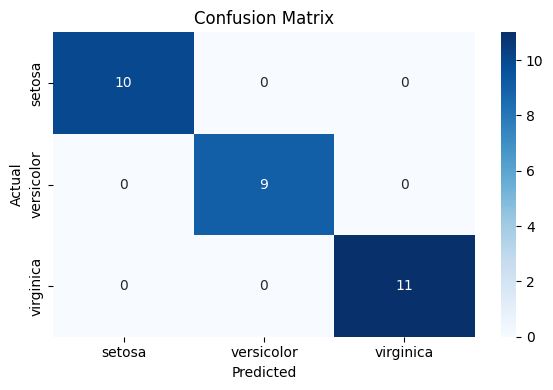

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()